In [1]:
import numpy as np
import scipy.constants as cc

import matplotlib.pyplot as plt

from RachbaJunction import RachbaJunction
from RachbaJunction.utilities import *

In [6]:
alpha = [1, -1]
profile = [0]

junction = RachbaJunction([(0, 1), (0, 0.8)], [0.2e-2, 0, 0], logg = True)

M_tot, vel_factor = junction.get_transfer_matrix(0.01)
# M_tot = set_zeros(M_tot)
# M_tot = junction.get_transfer_matrix(0.001)


DEBUG -  0: X_i+ boundary matrix
	alpha = 0.8
	x_i = 0
	E_so = 0.014802331298720254
	h_xy = 0.002
INFO - -->Rashba regime
INFO - 	out of gap energy range
DEBUG - 		rigth lead
DEBUG - 		-->b - velcity 1574736996552840.8
DEBUG - 		-->a - velcity -1574736996552840.8
DEBUG - 		-->b - velcity 1533895044265939.2
DEBUG - 		-->a - velcity -1533895044265939.2
DEBUG -  0: X_i- boundary matrix
	alpha = 1
	x_i = 0
	E_so = 0.02312864265425039
	h_xy = 0.002
INFO - -->Rashba regime
INFO - 	out of gap energy range
DEBUG - 		rigth lead
DEBUG - 		-->b - velcity 1819114879160344.8
DEBUG - 		-->a - velcity -1819114879160344.8
DEBUG - 		-->b - velcity 1775375394515770.2
DEBUG - 		-->a - velcity -1775375394515770.2


In [7]:
ft = (M_tot[1,1]*M_tot[3,3])/(M_tot[1,1]*M_tot[3,3] - M_tot[1,3]*M_tot[3,1])

sig_11 = ft*(M_tot[1,3]*M_tot[3,0] - M_tot[1,0]*M_tot[3,3])/(M_tot[1,1]*M_tot[3,3])

sig_12 = ft*(M_tot[1,3]*M_tot[3,2] - M_tot[1,2]*M_tot[3,3])/(M_tot[1,1]*M_tot[3,3])

sig_13 = ft/M_tot[1,1]

sig_14 = -ft*M_tot[1,3]/(M_tot[1,1]*M_tot[3,3])

sig_21 = -(M_tot[3,0] + M_tot[3,1]*sig_11)/M_tot[3,3]

sig_22 = -(M_tot[3,1]*sig_12 + M_tot[3,2])/M_tot[3,3]

sig_23 = -M_tot[3,1]*sig_13/M_tot[3,3]

sig_24 = (1 - M_tot[3,1]*sig_14)/M_tot[3,3]

sig_31 = M_tot[0,0] + M_tot[0,1]*sig_11 + M_tot[0,3]*sig_12

sig_32 = M_tot[0,2] + M_tot[0,1]*sig_12 + M_tot[0,3]*sig_22

sig_33 = M_tot[0,1]*sig_13 + M_tot[0,3]*sig_23

sig_34 = M_tot[0,1]*sig_14 + M_tot[0,3]*sig_24

sig_41 = M_tot[2,0] + M_tot[2,1]*sig_11 + M_tot[2,3]*sig_12

sig_42 = M_tot[2,2] + M_tot[2,1]*sig_12 + M_tot[2,3]*sig_22

sig_43 = M_tot[2,1]*sig_13 + M_tot[2,3]*sig_23

sig_44 = M_tot[2,1]*sig_14 + M_tot[2,3]*sig_24


S = np.array([[sig_11, sig_12, sig_13, sig_14], [sig_21, sig_22, sig_23, sig_24], [sig_31, sig_32, sig_33, sig_34], [sig_41, sig_42, sig_43, sig_44]])

# S, _ =  S_rashba_rashba(M_tot)

S = vel_factor * S

# print(set_zeros(np.matmul(S.T.conj(), S)))
print(tabulate(set_zeros(np.matmul(S.T.conj(), S)).real))
print(tabulate(set_zeros(np.matmul(S.T.conj(), S)).imag))
print("\n\n")

# print(tabulate(S.real))
# print(tabulate(S.imag))


# print(np.matmul(S.T.conj(), S))

scater_matrix_iunfo(S)

------------  -----------  ------------  -----------
 1.0212       0.000141494  -1.07786e-05  0.000772564
 0.000141494  1             1.77541e-15  1.27849e-15
-1.07786e-05  1.77541e-15   1            1.69571e-14
 0.000772564  1.27849e-15   1.69571e-14  1
------------  -----------  ------------  -----------
-  -  -  -
0  0  0  0
0  0  0  0
0  0  0  0
0  0  0  0
-  -  -  -



scattering matrix
	real part
-  -  -  -
0  0  0  0
0  0  0  0
0  0  0  0
0  0  0  0
-  -  -  -
	immaginary part
------------  ------------  ----------  ----------
 0.000980186  -0.0730555    -0.99723    -0.0139131
 0.0730555     0.000980186   0.0139131  -0.99723
-1.00781      -0.0139131     0.0010583  -0.0730544
 0.0139187    -0.99723       0.0730544   0.0010583
------------  ------------  ----------  ----------
inverse vs complex conjugated: False
inverse vs transpose complex conjugated: False



trasmission coefficient: (0,1);(1,0)
0.00533711016544011
0.00533711016544009



reflection coefficient:(0,0);(1,1)
9.607

In [5]:
S, _ =  S_rashba_rashba(M_tot)

print(S)

S = vel_factor * S

print(np.matmul(S.T.conj(), S))

# print(np.matmul(S.T.conj(), S))

scater_matrix_iunfo(S)


[[ 6.89264301e-05+0.00620141j  8.94859960e-01+0.00090226j]
 [ 1.11744917e+00+0.00112669j -8.14316644e-05+0.00620126j]]
[[ 1.00000000e+00+0.00000000e+00j -1.35068138e-16+2.16619528e-15j]
 [-1.35068138e-16-2.16619528e-15j  1.00000000e+00+0.00000000e+00j]]
scattering matrix
	real part
-----------  ----------
-0.00620141  0.99998
 0.99998     0.00620126
-----------  ----------
	immaginary part
-----------  -----------
6.89264e-05  0.00100825
0.00100825   8.14317e-05
-----------  -----------
inverse vs complex conjugated: True
inverse vs transpose complex conjugated: True



trasmission coefficient: (0,1);(1,0)
0.9999615377953159
0.9999615377953197



reflection coefficient:(0,0);(1,1)
3.846220468213377e-05
3.846220468213228e-05



1.0000000000000018
0.9999999999999981



0.9999999999999981
1.0000000000000018


In [11]:
_, S2 =  S_rashba_rashba(M_tot)

scater_matrix_iunfo(S2)

scattering matrix
[[ 0.02234656-0.01060703j -0.01084942+0.0391688j ]
 [ 0.03927981+0.01000747j -0.01206082-0.02389276j]] 


inverse vs complex conjugated: False
inverse vs transpose complex conjugated: False



trasmission coefficient: (0,1);(1,0)
0.0016519045244168772
0.0016430527988145417



reflection coefficient:(0,0);(1,1)
0.000611877717832222
0.0007163271424960791



0.0022549305166467636
0.0023682316669129564



0.002263782242249099
0.0023593799413106206


In [9]:
print(np.linalg.norm(S[0,1])**2 - np.linalg.norm(S2[0,1])**2)
print(np.linalg.norm(S[1,0])**2 - np.linalg.norm(S2[1,0])**2)

# print(np.linalg.norm(S[1,1])**2 - np.linalg.norm(S2[1,1])**2)

0.9994061620839493
0.9994150138095521


In [9]:
alpha_coef = np.append(np.arange(-1.4, -0.4, 0.1), np.arange(0.4, 1.4, 0.1))


junction = RachbaJunction([(0, 1), (3, -1.4)], [0.2e-2, 0, 0])

trasmission_coeff = []
for i in alpha_coef:
    junction.alpha_profile = [(0, 1), (3, i)]
    M_tot, vel_factor = junction.get_transfer_matrix(0)
    M_tot = set_zeros(M_tot)
    S, _ =  S_rashba_rashba(M_tot)
    S = vel_factor * S
    trasmission_coeff.append(np.linalg.norm(S[0,1])**2)
    
    

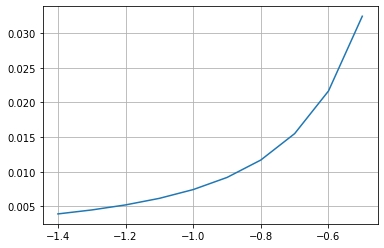

In [10]:
plt.plot(alpha_coef[0:int(alpha_coef.shape[0]/2)], trasmission_coeff[0:int(alpha_coef.shape[0]/2)])
# plt.plot(alpha_coef[int(alpha_coef.shape[0]/2):], trasmission_coeff[int(alpha_coef.shape[0]/2):])
plt.grid(True)

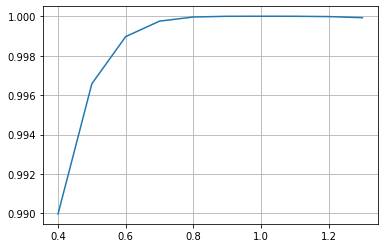

In [6]:
plt.plot(alpha_coef[int(alpha_coef.shape[0]/2):], trasmission_coeff[int(alpha_coef.shape[0]/2):])
plt.grid(True)

In [6]:
type(np.float64(np.sign(-3)))

numpy.float64